In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,  KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [5]:
ls archive/

animal_crossing_dataset.csv  doom_crossing_dataset.csv


In [3]:
acnh_colors=pd.read_csv('acnh_colors.csv')
doom_colors=pd.read_csv('doom_colors.csv')

In [6]:
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')
doom=pd.read_csv('archive/doom_crossing_dataset.csv')

In [7]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [8]:
Xa=pd.DataFrame(acnh['title']).set_index(index_a)
Xd=pd.DataFrame(doom['title']).set_index(index_d)
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])
for title in X_titles.iloc[:,0]:
    title.replace('villagers', 'villager')

In [9]:
y=pd.get_dummies(y)
y=y.iloc[:,0]

In [10]:
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)  # Checkout out the options!
document_tfidf_matrix = tfidf.fit_transform(X_titles.iloc[:,0])
X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X_titles.index, inplace=True)

In [16]:
X_color=doom_colors.append(acnh_colors).set_index(keys='filename')

In [17]:
X_color

,0b,0count,0g,0r,10b,10count,10g,10r,11b,11count,...,7g,7r,8b,8count,8g,8r,9b,9count,9g,9r
filename,,,,,,,,,,,,,,,,,,,,,
ksn72cinsy151.png,40.0,461.0,45.0,165.0,80.0,2409.0,75.0,80.0,150.0,3143.0,...,70.0,80.0,205.0,1983.0,200.0,210.0,90.0,2091.0,45.0,55.0
ik4d2mpi1fo41.png,60.0,264.0,85.0,30.0,55.0,4404.0,40.0,80.0,80.0,4678.0,...,65.0,110.0,110.0,2963.0,100.0,120.0,95.0,3504.0,85.0,105.0
y5pddy7h16x41.png,80.0,793.0,225.0,225.0,150.0,3905.0,240.0,190.0,145.0,4567.0,...,250.0,155.0,220.0,3253.0,255.0,195.0,170.0,3657.0,245.0,125.0
jrk0eogay8s41.png,70.0,50.0,15.0,250.0,100.0,941.0,100.0,100.0,60.0,1036.0,...,175.0,175.0,200.0,839.0,200.0,200.0,120.0,913.0,125.0,120.0
7c3lyx28tzt41.png,235.0,315.0,45.0,205.0,55.0,2934.0,50.0,65.0,80.0,4306.0,...,100.0,120.0,20.0,1436.0,30.0,185.0,95.0,2929.0,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23tuxt9bkev41.png,115.0,1099.0,135.0,90.0,125.0,4320.0,110.0,140.0,40.0,4753.0,...,85.0,120.0,135.0,3736.0,175.0,10.0,80.0,4229.0,70.0,90.0
7o0coqjaqfo41.png,180.0,472.0,75.0,215.0,95.0,2675.0,70.0,205.0,0.0,2991.0,...,215.0,240.0,90.0,2511.0,65.0,100.0,195.0,2519.0,120.0,125.0
w0ddyr9atvu41.png,185.0,2013.0,180.0,190.0,150.0,4349.0,60.0,120.0,125.0,5282.0,...,15.0,45.0,90.0,3823.0,50.0,130.0,175.0,4087.0,95.0,255.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_color, y, test_size=0.2)

In [19]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df['F1'] = 2*((df.tp/(df.tp + df.fp)) * (df.tp/(df.tp + df.fn)))/((df.tp/(df.tp + df.fp)) + (df.tp/(df.tp + df.fn)))
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df, val):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC"+f'{1/val} Regularization Constant')
    #ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr', fontsize=14)
    ax.set_ylabel('tpr', fontsize=14)
    #ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)
    ax.legend()

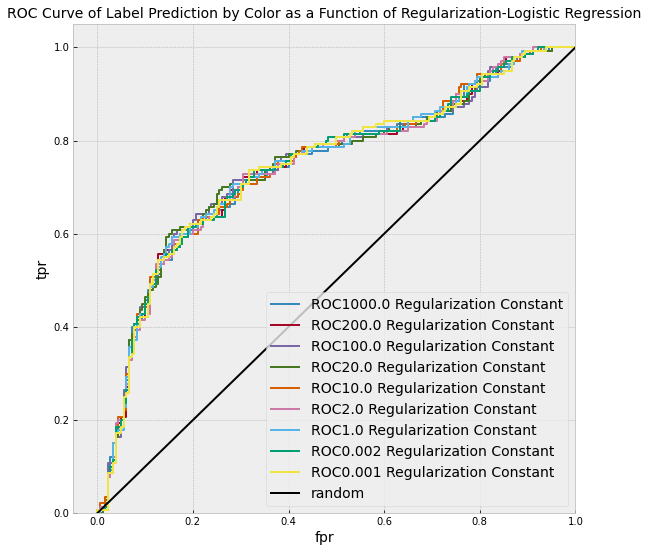

In [22]:
fig, (ax0) = plt.subplots(figsize=(9,9))
plt.style.use('bmh')
C_val=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 500, 1000]
for val in C_val:
    model_C = LogisticRegression(C=val, max_iter=300)#solver lbfgs, L2 cost function
    model_C.fit(X_train, y_train)
    df = calculate_threshold_values(model_C.predict_proba(X_test)[:,1], y_test)
    plot_roc(ax0, df, val)
ax0.set_xlim(-0.05, 1)
ax0.set_ylim(0, 1.05)
ax0.plot([0,1],[0,1], 'k', label="random")
ax0.legend(fontsize=14)
ax0.set_title('ROC Curve of Label Prediction by Color as a Function of Regularization-Logistic Regression', fontsize=14);
#plt.savefig('log_regres/Title_ROC_reg', bbox_inches='tight')

In [26]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various
    values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression
      object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of
      alpha and each cross validation fold.  Each row represents a CV fold, and
      each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        kf = KFold(n_splits=n_folds)
        
        for idx, (train, test) in enumerate(kf.split(X)):
    
            X_cv_train, y_cv_train = X.iloc[train], y.iloc[train]
            X_cv_test, y_cv_test = X.iloc[test], y.iloc[test]
      
            standardizer = StandardScaler()
            standardizer.fit(X_cv_train)
            X_cv_train_std= standardizer.transform(X_cv_train)
            X_cv_test_std= standardizer.transform(X_cv_test)
            
            m = model(C = alpha, max_iter=1000)
            m.fit(X_cv_train_std, y_cv_train)
        
            y_hat_train = m.predict(X_cv_train_std)
            y_hat_test = m.predict(X_cv_test_std)
        
            cv_errors_train[alpha][idx] = accuracy_score(y_cv_train, y_hat_train)
            cv_errors_test[alpha][idx] = accuracy_score(y_cv_test, y_hat_test)

    return cv_errors_train, cv_errors_test

In [41]:
inv_str=np.linspace(0.0001, 10, 200)

strength=1/inv_str

In [42]:
cv_errors_train, cv_errors_test = train_at_various_alphas(
    X_train, y_train, LogisticRegression, inv_str)  #these are dataframes cols are alpha, index are the folds, mean sq error as vals

In [49]:
avg_errors_train = cv_errors_train.mean()
avg_errors_test = cv_errors_test.mean()
max_acc=avg_errors_test.max()

In [50]:
def get_optimal_alpha(avg_errors_test):
    alphas = avg_errors_test.index
    optimal_idx = np.argmax(avg_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha, optimal_idx
optimal_alpha, optimal_idx = get_optimal_alpha(avg_errors_test)

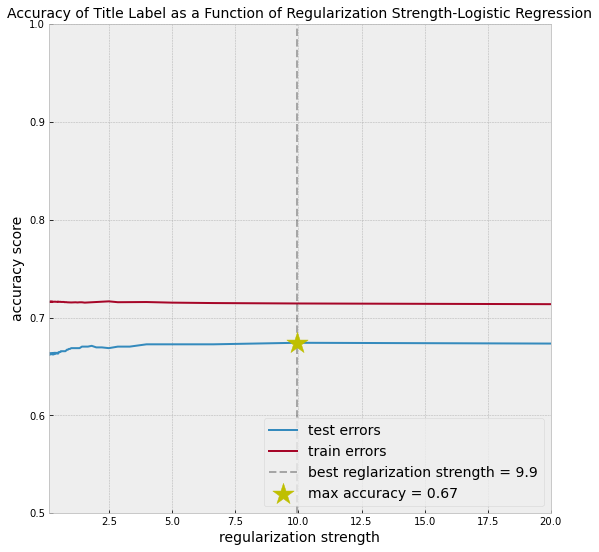

In [52]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(strength, avg_errors_test, label = 'test errors')
ax.plot(strength, avg_errors_train, label = 'train errors')
ax.set_xlabel('regularization strength', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Title Label as a Function of Regularization Strength-Logistic Regression', fontsize=14)
ax.set_xlim(0.1, 20)
ax.set_ylim(0.5, 1)
ax.scatter(1/optimal_alpha, max_acc, label = f'max accuracy = {max_acc:.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(1/optimal_alpha, label = f'best reglarization strength = {(1/optimal_alpha).round(1)}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
#plt.savefig('log_regres/Title_rec_reg', bbox_inches='tight')